## Libraries import

In [14]:
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#per poter gestire file csv
import pandas as pd

download dataset from  kaggle: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

In [2]:
!kaggle datasets download uom190346a/sleep-health-and-lifestyle-dataset


  0%|          | 0.00/2.54k [00:00<?, ?B/s]
100%|██████████| 2.54k/2.54k [00:00<00:00, 208kB/s]


SPIEGARE COME è FATTO IL DATASET

### Extract and unzip dataset

In [3]:
zip_path = r"C:\Users\greta\Downloads\sleep-health-and-lifestyle-dataset.zip"
final_path = r"C:\Users\Greta\Desktop\Sleep_Data" 

# Crea la directory di destinazione se non esiste
os.makedirs(final_path, exist_ok=True)


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(final_path)

In [4]:
dataset = r"C:\Users\Greta\Desktop\Sleep_Data\Sleep_health_and_lifestyle_dataset.csv" 
# Carica i dati in un DataFrame
df = pd.read_csv(dataset)

# Data visualization:

In [6]:
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [8]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [9]:
columns = [column for column in df.columns if column!='Person ID']

In [10]:
for column in columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


Unique values in 'Gender': ['Male' 'Female']
Unique values in 'Age': [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]
Unique values in 'Occupation': ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Unique values in 'Sleep Duration': [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
Unique values in 'Quality of Sleep': [6 4 7 5 8 9]
Unique values in 'Physical Activity Level': [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
Unique values in 'Stress Level': [6 8 7 4 3 5]
Unique values in 'BMI Category': ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Unique values in 'Blood Pressure': ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95

## SLEEP DISORDER

In [51]:
# sostituisco i valori NaN con 'No disorder'
df['Sleep Disorder'].fillna('No Disorder', inplace=True)

In [52]:
sleep_disorder_conteggio = df['Sleep Disorder'].value_counts().reset_index()
print(sleep_disorder_conteggio)

  Sleep Disorder  count
0    No Disorder    219
1    Sleep Apnea     78
2       Insomnia     77


In [53]:
fig=px.pie(sleep_disorder_conteggio,values='count',names='Sleep Disorder',title="Sleep Disorder category")
fig.show()

## BMI CATEGORY

In [57]:
#sostituisco normal con normal weight
df['BMI Category']=df['BMI Category'].replace({'Normal':'Normal Weight'})
BMI_Category_conteggio=df['BMI Category'].value_counts().reset_index()
BMI_Category_conteggio

,BMI Category,count
0,Normal Weight,216
1,Overweight,148
2,Obese,10


In [58]:
fig=px.pie(BMI_Category_conteggio,values='count',names='BMI Category',title="the BMI Category")
fig.show()

## GENDER

In [59]:
gender_conteggio = df["Gender"].value_counts().reset_index()
fig = px.pie( gender_conteggio , values= "count", names="Gender")
fig.show()

# QUESTIONS

### 
come cambia la qualità del sonno in base all'eta? MANCA Is there a difference in how sleep quality varies with age between men and women?"
MANCA quale fascia d'età ha il sonno migliore e peggiore?  Are the worst sleep qualities associated with obesity or underweight individuals in certain age groups
il lavoro che fai influisce in qualche modo sullo sleep disorder? Are men or women in certain occupations more likely to have sleep disorders?"

In [143]:
'''df['bin_age'] = pd.cut(df['Age'], bins=[25, 30, 35 ,40, 45,50,55 ], 
                          labels=['25-30', '31-35', '36-40', '41-45', '46-50', '51+'])
disorder_counts = df.groupby(['bin_age', 'Sleep Disorder']).size().unstack(fill_value=0)
disorder_proportions = disorder_counts.div(disorder_counts.sum(axis=1), axis=0) * 100

# Reset index for plotting
disorder_proportions = disorder_proportions.reset_index()

# Melt the dataframe for Plotly
melted_df = disorder_proportions.melt(id_vars='bin_age', var_name='Sleep Disorder', value_name='Percentage')

# Create the Interactive Plot
fig = px.bar(melted_df, x='bin_age', y='Percentage', color='Sleep Disorder', text='Percentage',
             title='Proporzione di Disturbi del Sonno per Fascia di Età',
             labels={'Age Group': 'Fascia di Età', 'Percentage': 'Percentuale', 'Sleep Disorder': 'Disturbo del Sonno'},
             color_discrete_sequence=px.colors.sequential.Viridis)

# Update layout for better readability
fig.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'})
fig.update_traces(texttemplate='%{text:.2f}%', textposition='inside')

# Show the plot
fig.show()'''


"df['bin_age'] = pd.cut(df['Age'], bins=[25, 30, 35 ,40, 45,50,55 ], \n                          labels=['25-30', '31-35', '36-40', '41-45', '46-50', '51+'])\ndisorder_counts = df.groupby(['bin_age', 'Sleep Disorder']).size().unstack(fill_value=0)\ndisorder_proportions = disorder_counts.div(disorder_counts.sum(axis=1), axis=0) * 100\n\n# Reset index for plotting\ndisorder_proportions = disorder_proportions.reset_index()\n\n# Melt the dataframe for Plotly\nmelted_df = disorder_proportions.melt(id_vars='bin_age', var_name='Sleep Disorder', value_name='Percentage')\n\n# Create the Interactive Plot\nfig = px.bar(melted_df, x='bin_age', y='Percentage', color='Sleep Disorder', text='Percentage',\n             title='Proporzione di Disturbi del Sonno per Fascia di Età',\n             labels={'Age Group': 'Fascia di Età', 'Percentage': 'Percentuale', 'Sleep Disorder': 'Disturbo del Sonno'},\n             color_discrete_sequence=px.colors.sequential.Viridis)\n\n# Update layout for better readab

## come cambia la qualità del sonno in base all'eta?

In [145]:
# creo la colonna dei raggruppamenti per età
df['bin_age'] = pd.cut(df['Age'], bins=[25, 30, 35 ,40, 45,50,55 ], 
                          labels=['25-30', '31-35', '36-40', '41-45', '46-50', '51+'])

# calcolo la media della qualità del sonno per ciascun gruppo di età
age_group_quality = df.groupby(['bin_age', 'Gender'])['Sleep Duration'].mean().reset_index()


print(age_group_quality)


   bin_age  Gender  Sleep Duration
0    25-30  Female        6.450000
1    25-30    Male        6.982143
2    31-35  Female        6.516667
3    31-35    Male        6.855357
4    36-40  Female        7.187179
5    36-40    Male        7.250000
6    41-45  Female        6.620000
7    41-45    Male        7.068116
8    46-50  Female        6.140000
9    46-50    Male        7.700000
10     51+  Female        7.958140
11     51+    Male             NaN


C:\Users\greta\AppData\Local\Temp\ipykernel_8056\3913566890.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [146]:
male_data = age_group_quality[age_group_quality['Gender'] == 'Male']
female_data = age_group_quality[age_group_quality['Gender'] == 'Female']

In [147]:
print(male_data)

   bin_age Gender  Sleep Duration
1    25-30   Male        6.982143
3    31-35   Male        6.855357
5    36-40   Male        7.250000
7    41-45   Male        7.068116
9    46-50   Male        7.700000
11     51+   Male             NaN


In [148]:
print(female_data)

   bin_age  Gender  Sleep Duration
0    25-30  Female        6.450000
2    31-35  Female        6.516667
4    36-40  Female        7.187179
6    41-45  Female        6.620000
8    46-50  Female        6.140000
10     51+  Female        7.958140


In [ ]:
fig = px.bar(
    age_group_quality,
    x="bin_age",
    y="Sleep Duration",
    color="Gender",
    barmode="group",  
    color_discrete_sequence=px.colors.qualitative.Set1_r, #CAMBIO COLORI
    title="Qualità del Sonno per Fascia di Età e Genere",
    labels={"bin_age": "Age", "Sleep Duration": "Sleep Duration(hrs)", "Gender": "Gender"},
)


fig.add_hline(
    y=7,
    line=dict(color="red", dash="dash", width=2),
    annotation_text="7 hrs",
    annotation_position="top right",
    annotation_font_size=12
)


fig.update_layout(
    xaxis_title="Age Group",  
    yaxis_title="Sleep duration (mean hrs)",  
    legend_title="Gender",  
    title_font_size=16, 
    title_x=0.5,  
    xaxis=dict(tickmode='linear'),  # Assicurati che le etichette siano tutte ben visibil
    yaxis=dict(range=[0, age_group_quality['Sleep Duration'].max() + 1]),  # Aggiungi spazio sopra per miglior visualizzazione
    font=dict(size=12), 
    margin=dict(t=40, b=40, l=50, r=50),  
    template="plotly_white",  
)


fig.show()


## il lavoro che fai influisce in qualche modo sullo sleep disorder? 

### Calcolo la percentuale di persone con disturbi del sonno per ogni professione

In [124]:
sleep_disorders = df[df['Sleep Disorder'] != 'No Disorder']

#calcolo quante persone hanno un disturbo del sonno 
disorder_conteggio= sleep_disorders.groupby(['Occupation', 'Sleep Disorder']).size().unstack(fill_value=0)

In [125]:
print(disorder_conteggio)

Sleep Disorder        Insomnia  Sleep Apnea
Occupation                                 
Accountant                   7            0
Doctor                       3            4
Engineer                     5            1
Lawyer                       2            3
Nurse                        3           61
Sales Representative         0            2
Salesperson                 29            1
Scientist                    0            2
Software Engineer            1            0
Teacher                     27            4


In [152]:
tot = df['Occupation'].value_counts()

#percentuale di persone con disturbi del sonno per ogni occupazione
disorder_percentages = disorder_conteggio.div(tot, axis=0) * 100

In [153]:
#trasformo in dataframe
disorder_percentages = disorder_percentages.reset_index().melt(id_vars='Occupation', 
                                                               var_name='Sleep Disorder', 
                                                               value_name='Percentage')


In [179]:
fig = px.bar(disorder_percentages, x='Percentage', y='Occupation', color='Sleep Disorder', 
             title='Distribuzione Percentuale dei Disturbi del Sonno per Occupazione',
             labels={'Sleep Disorder': 'Sleep Disorder', 'Percentage': 'Percentuale'},
             color_discrete_sequence=px.colors.qualitative.Pastel,  # Palette più leggibile
             orientation='h')


# Migliora la leggibilità
fig.update_layout(
    barmode='stack',  
    yaxis={'categoryorder': 'total ascending'},  # Ordina occupazioni in base alla somma
    xaxis_title='Percentuale di lavoratori con disturbi del sonno (%)',
    yaxis_title='',
    legend_title='Tipo di Disturbo del Sonno',
    template='plotly_white',  # Sfondo più pulito
    margin=dict(l=120, r=20, t=50, b=50),  # Spaziatura ottimizzata
)

fig.update_traces(
    hovertemplate="<b>Sleep Disorder:%{color_discrete_sequence} <b>Percentuale:</b> %{x:.2f}%"  # Nasconde il nome dell'occupazione
)

fig.show()

## Quale gender tende A SOFFRIRE DI PIU DI DISTRURBI DEL SONNO RISPETTO AI LAVORI SVOLTI?

In [68]:
sleep_disorders = df[~df['Sleep Disorder'].isna()]

#conto il numero di male/female per ogni lavoro svolto
sleepDisorder_lavoro_gender = sleep_disorders.groupby(['Occupation', 'Gender']).size()

# Conta il numero totale per ciascun genere+lavoro
totale = df.groupby(['Occupation', 'Gender']).size()

proporzione_lavoro_gender = (sleepDisorder_lavoro_gender / totale) * 100

In [79]:
#converto in datatframe
proporzione_df = proporzione_lavoro_gender.reset_index()
#rinomino le colonne
proporzione_df.columns = ['Occupation', 'Gender', 'Sleep Disorder Proportion (%)']

# Ordino decrescente
proporzione_df = proporzione_df.sort_values(by='Sleep Disorder Proportion (%)', ascending=False)

print(proporzione_df)


              Occupation  Gender  Sleep Disorder Proportion (%)
10  Sales Representative    Male                     100.000000
11           Salesperson    Male                      93.750000
9                  Nurse  Female                      87.671233
14               Teacher  Female                      80.000000
15               Teacher    Male                      60.000000
6                 Lawyer  Female                      50.000000
12             Scientist  Female                      50.000000
13     Software Engineer    Male                      25.000000
0             Accountant  Female                      19.444444
5               Engineer    Male                      16.129032
3                 Doctor    Male                      10.144928
7                 Lawyer    Male                       8.888889
4               Engineer  Female                       3.125000
1             Accountant    Male                            NaN
2                 Doctor  Female        

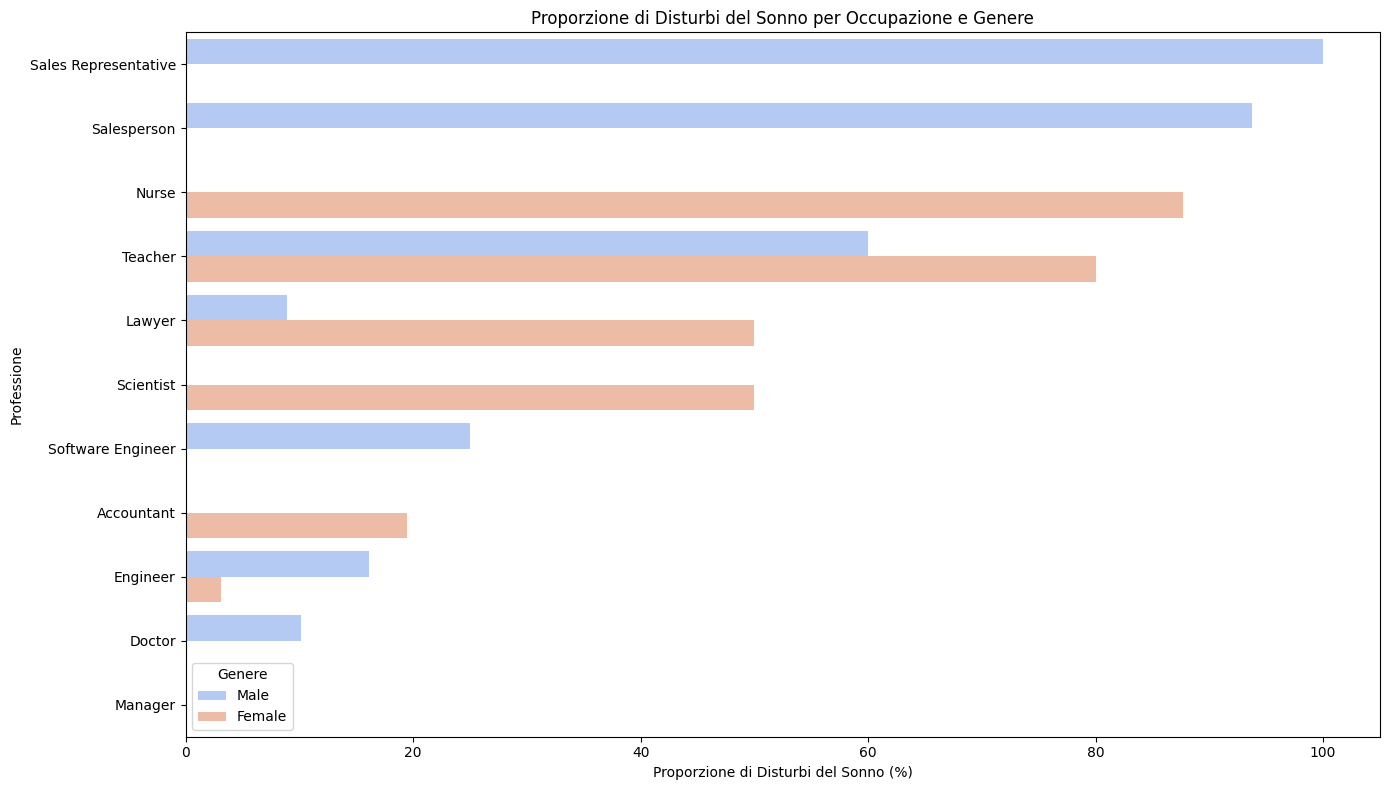

In [80]:
plt.figure(figsize=(14, 8))
sns.barplot(
    data=proportion_df, 
    y='Occupation', 
    x='Sleep Disorder Proportion (%)', 
    hue='Gender', 
    palette='coolwarm'
)
plt.title('Proporzione di Disturbi del Sonno per Occupazione e Genere')
plt.ylabel('Professione')
plt.xlabel('Proporzione di Disturbi del Sonno (%)')
plt.legend(title='Genere')
plt.tight_layout()
plt.show()


## Domanda: bmi category e sleep disorder correlazione

In [156]:
bmi_percent = df.groupby(['BMI Category', 'Sleep Disorder']).size().unstack(fill_value=0)
bmi_percent = bmi_percent.div(bmi_percent.sum(axis=1), axis=0) * 100


bmi_percent = bmi_percent.reset_index()
bmi_percent = bmi_percent.melt(id_vars='BMI Category', var_name='Sleep Disorder', value_name='Percentage')

In [158]:
fig = px.histogram(
    bmi_percent,
    x="BMI Category",
    y="Percentage",
    color="Sleep Disorder",
    title="Percentuale di Disturbi del Sonno per Categoria BMI",
    labels={"BMI Category": "Categoria BMI", "Percentage": "Percentuale", "Sleep Disorder": "Disturbo del Sonno"},
    barmode="stack"  # Stack delle barre per mostrare la somma al 100%
)

fig.show()